In [0]:
import numpy as np
import pandas as pd
import os
import pandas_datareader as web
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from matplotlib import style

In [0]:
import requests
from bs4 import BeautifulSoup

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import datetime as dt

In [0]:
def savesp500tickers():
  result= requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup= BeautifulSoup(result.text,"lxml")
  table=soup.find('table')
  tickers=[]
  company=[]

  for row in table.find_all('tr')[1:]:
    ticker= row.find_all('td')[0].text
    stock= row.find_all('td')[1].text
    tickers.append(ticker)
    company.append(stock)

  with open("sp500ticker.pickle","wb") as f:
    pickle.dump(tickers,f)

  with open("sp500company.pickle","wb") as f:
    pickle.dump(company,f)
  
  for i in range(0,len(tickers)):
    print(tickers[i],"is the symbol for",company[i])
  


In [5]:
savesp500tickers()

MMM
 is the symbol for 3M Company
ABT
 is the symbol for Abbott Laboratories
ABBV
 is the symbol for AbbVie Inc.
ABMD
 is the symbol for ABIOMED Inc
ACN
 is the symbol for Accenture plc
ATVI
 is the symbol for Activision Blizzard
ADBE
 is the symbol for Adobe Systems Inc
AMD
 is the symbol for Advanced Micro Devices Inc
AAP
 is the symbol for Advance Auto Parts
AES
 is the symbol for AES Corp
AFL
 is the symbol for AFLAC Inc
A
 is the symbol for Agilent Technologies Inc
APD
 is the symbol for Air Products & Chemicals Inc
AKAM
 is the symbol for Akamai Technologies Inc
ALK
 is the symbol for Alaska Air Group Inc
ALB
 is the symbol for Albemarle Corp
ARE
 is the symbol for Alexandria Real Estate Equities
ALXN
 is the symbol for Alexion Pharmaceuticals
ALGN
 is the symbol for Align Technology
ALLE
 is the symbol for Allegion
AGN
 is the symbol for Allergan, plc
ADS
 is the symbol for Alliance Data Systems
LNT
 is the symbol for Alliant Energy Corp
ALL
 is the symbol for Allstate Corp
GOOG

In [0]:
if not os.path.exists('stock_data'):
    os.makedirs('stock_data')
start= dt.datetime(2019,12,31)
end= dt.datetime(2020,1,29)

In [45]:
x=input("Enter the Symbol of company: ")
df= web.DataReader(x,'yahoo',start,end)
df.to_csv('stock_data/stock.csv')

Enter the Symbol of company: WEC


In [0]:
stock= pd.read_csv('stock_data/stock.csv')

In [47]:
stock.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1035,2020-01-23,98.919998,98.059998,98.330002,98.699997,1740200.0,98.699997
1036,2020-01-24,99.699997,98.599998,98.690002,98.959999,1179300.0,98.959999
1037,2020-01-27,99.690002,98.260002,98.949997,98.500000,1393400.0,98.500000
1038,2020-01-28,98.820000,97.809998,98.629997,98.500000,2211800.0,98.500000
1039,2020-01-29,98.629997,97.680000,98.519997,98.379997,760011.0,98.379997


In [0]:
dates=[]
prices=[]

In [0]:
stock=stock.head(len(df)-1)

In [0]:
stock_dates= stock.loc[:,'Date']
stock_open= stock.loc[:,'Open']

In [0]:
for date in stock_dates:
  dates.append([int(date.split('-')[2])])

for open_price in stock_open:
  prices.append(float(open_price))

In [0]:
def predict_prices(dates, prices, x):
  
  lin_reg = LinearRegression()
  lin_reg.fit(dates,prices)
  
  style.use('fivethirtyeight')
  plt.figure(figsize=(16,8))
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()
  
  return lin_reg.predict(x)[0]

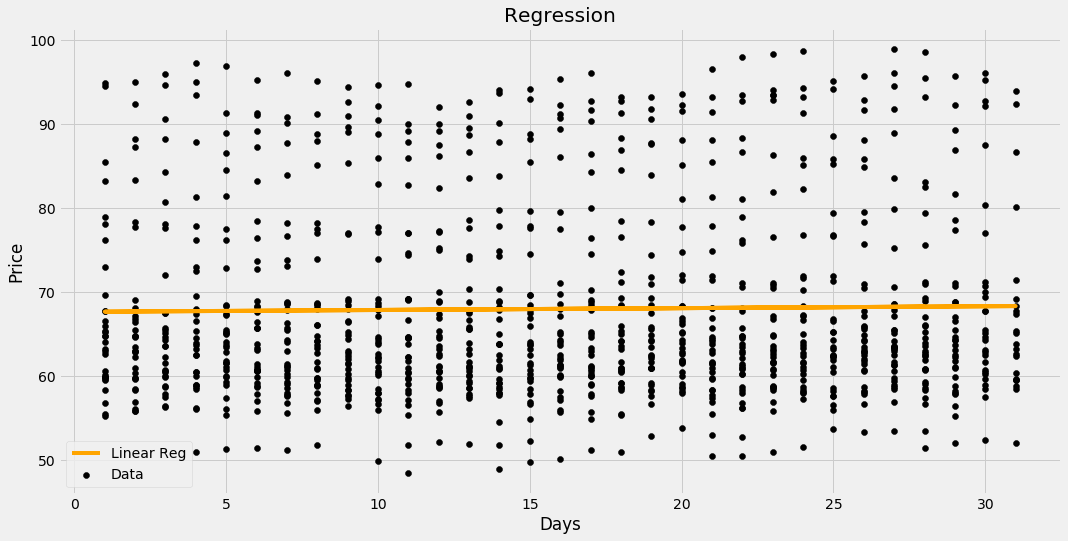

68.28893396951018


In [53]:
predicted_price = predict_prices(dates, prices, [[29]])
print(predicted_price)